## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

c:\Users\El-Wattaneya\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\El-Wattaneya\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


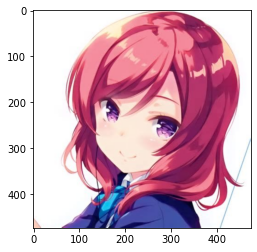

In [2]:
img = cv2.cvtColor(cv2.imread('image.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


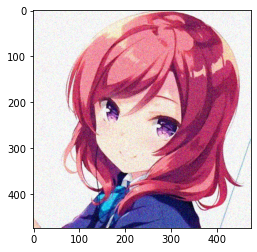

In [3]:
# add random noise to the image
img = img/255.
s = (474,474,3)
mean = 0
var = 0.01
sigma = np.sqrt(var)
noise = np.random.normal(loc = mean, scale= sigma,size=s)
img_n = img + noise

plt.imshow(img_n)
plt.show()

In [4]:
# split the image into it's three channels

df_blue,df_green,df_red = cv2.split(img_n)

In [5]:
# Apply PCA on each channel

pca_b = PCA(n_components=50)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)

pca_g = PCA(n_components=50)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)

pca_r = PCA(n_components=50)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

img_reduced_before_inverse = (cv2.merge((trans_pca_b, trans_pca_g, trans_pca_r))) # merge the three channels

b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
# print(b_arr.shape, g_arr.shape, r_arr.shape)

In [6]:
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(474, 474, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


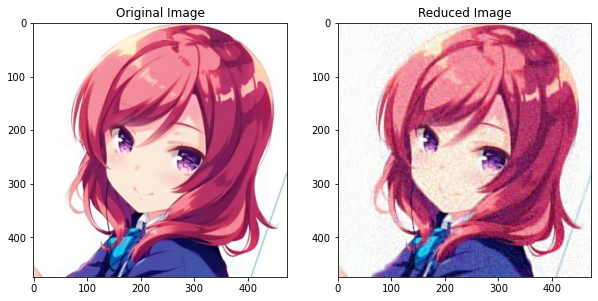

In [13]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()


In [14]:
rate_of_comp = ((img.shape[0]*img.shape[1]) - (img_reduced_before_inverse.shape[0]*img_reduced_before_inverse.shape[1])) / (img.shape[0]*img.shape[1])

print("rate of comperssion: " , rate_of_comp*100)

rate of comperssion:  89.45147679324894
